In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_finance import candlestick_ohlc

import matplotlib.dates as mdates
import datetime as dt
from datetime import date, timedelta
from datetime import timedelta, datetime


import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [40]:
df = pd.read_csv('./data/BTC-USD.csv',sep=',', date_parser=True)
df.drop('Adj Close', inplace = True, axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [41]:
End = '2017-08-20'

In [42]:
End = pd.to_datetime(End)
Start = (End - timedelta(days=365))
df1 = df.loc[Start:End]
df1.index = df1.index.map(mdates.date2num)

In [43]:
Min_pozycja = df1['Low'].argmin()
Max_pozycja = df1['High'].argmax()

In [44]:
if Min_pozycja < Max_pozycja and Max_pozycja > len(df1)-10:
    
    # Trend L1 wzrostowy, liczony od połowy wykresu
    End = pd.to_datetime(End)
    Start = (End - timedelta(days=180))
    df1 = df.loc[Start:End]
    df1.index = df1.index.map(mdates.date2num)
    
    Min_pozycja = df1['Low'].argmin()
    Max_pozycja = df1['High'].argmax()
    
    Max_idx = df1.iloc[Max_pozycja].name
    Ax = df1.iloc[Min_pozycja].name
    Ay = df1['Low'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df1.iloc[Min_pozycja].name
    By = df1['Low'].loc[Bx]
    B = [Bx, By]
    
    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    df11=df1[A[0]:Max_idx]
    df11['Pozycja na LT'] = df11.index * a + b
    df11['check']= round(df11['Low'] - df11['Pozycja na LT'],0)
    good = df11['check'][df11['check']>=0].count()
    sum = len(df11['check'])
    
    for i in range(len(df11)):
        
        df11=df1[B[0]:Max_idx]
        Bx = df11.iloc[0].name
        By = df11['Low'].loc[Bx]
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx

        df11['Pozycja na LT'] = df11.index * a + b
        df11['check']= round(df11['Low'] - df11['Pozycja na LT'],0)
        good = df11['check'][df11['check']>=0].count()
        sum = len(df11['check'])

        if good == sum:
            print('Pierwszy trend:  Wzrostowy')
            print('Max/Min:  W ostatnich 20 dniach')
            print('------------------------------------------------------------------------------')
            print('TREND L1')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu L1 - wzrostowy')
            print(f'Punkt A:{A}, Punkt B: {B}')
            print('------------------------------------------------------------------------------')
            break
            
        else:
            df11=df1[B[0]+1:Max_idx]
            Bx = df11.iloc[0].name
            By = df11['Low'].loc[Bx]
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx
                

        X_long = [Ax, Bx]
        Y_long = [Ay, By]
        
    Last_low_price = df1.iloc[-1]['Low']
    Last_low_price_position = df1.iloc[-1].name
    Trend_price = Last_low_price_position * a + b
    
    for i in range(len(df1)-len(df11)):
        
        Last_low_price = df1.iloc[-1]['Low']
        Last_low_price_position = df1.iloc[-1].name
        Trend_price = Last_low_price_position * a + b
        
        Ax = Bx
        Ay = By
        A = [Ax, Ay]

        Bx = Ax
        By = Ay
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx
        
        if Trend_price >= Last_low_price:
            print('TREND M2 - właściwy')
            print(f'Punkt A:{A}, Punkt B: {B}')
            break
    
        else:
            
            Ax = Bx
            Ay = By
            A = [Ax, Ay]

            Bx = Ax
            By = Ax
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx

            df21 = df1[A[0]:Max_idx]
            df21['Pozycja na LT'] = df21.index * a + b
            df21['check']= round(df21['Low'] - df21['Pozycja na LT'],0)
            good = df21['check'][df21['check']>=0].count()
            sum = len(df21['check'])

            for i in range(len(df21)):

                df21=df1[B[0]:Max_idx]
                Bx = df21.iloc[0].name
                By = df21['Low'].loc[Bx]
                B = [Bx, By]

                a = (Ay-By)/(Ax-Bx)
                b = By - a*Bx

                df21['Pozycja na LT'] = df21.index * a + b
                df21['check']= round(df21['Low'] - df21['Pozycja na LT'],0)
                good = df21['check'][df21['check']>=0].count()
                sum = len(df21['check'])

                if good == sum:

                    print('TREND M1 - pomocniczy')
                    print(f'Punkt A:{A}, Punkt B: {B}')
                    print('------------------------------------------------------------------------------')
                    break

                else:
                    df21=df1[B[0]+1:Max_idx]
                    Bx = df21.iloc[0].name
                    By = df21['Low'].loc[Bx]
                    B = [Bx, By]

                    a = (Ay-By)/(Ax-Bx)
                    b = By - a*Bx
                    
                    Cx = df1.index.max()+2
                    Cy = a*Cx +b
                    C = [Cx, Cy]

                    X_mid1 = [Ax, Cx]
                    Y_mid1 = [Ay, Cy]
    



Pierwszy trend:  Wzrostowy
Max/Min:  W ostatnich 20 dniach
------------------------------------------------------------------------------
TREND L1
Znaleziona 2 punkty przez które można przeprowadzić linie trendu L1 - wzrostowy
Punkt A:[17250.0, 903.713013], Punkt B: [17363.0, 1843.030029]
------------------------------------------------------------------------------
TREND M1 - pomocniczy
Punkt A:[17363.0, 1843.030029], Punkt B: [17381.0, 2685.139893]
------------------------------------------------------------------------------
TREND M1 - pomocniczy
Punkt A:[17381.0, 2685.139893], Punkt B: [17382.0, 2743.719971]
------------------------------------------------------------------------------
TREND M1 - pomocniczy
Punkt A:[17382.0, 2743.719971], Punkt B: [17389.0, 3372.120117]
------------------------------------------------------------------------------
TREND M2 - właściwy
Punkt A:[17389.0, 3372.120117], Punkt B: [17389.0, 3372.120117]


In [45]:
df21.head()

,Open,High,Low,Close,Volume,Pozycja na LT,check
17389.0,3373.820068,3679.719971,3372.120117,3650.620117,2.021190e+09,3372.120117,-0.0
17390.0,3650.629883,3949.919922,3613.699951,3884.709961,2.219590e+09,3461.891566,152.0
17391.0,3880.040039,4208.390137,3857.800049,4073.260010,3.159090e+09,3551.663016,306.0
17392.0,4066.100098,4325.129883,3989.159912,4325.129883,2.463090e+09,3641.434465,348.0
17393.0,4326.990234,4455.970215,3906.179932,4181.930176,3.258050e+09,3731.205915,175.0


In [46]:
df1.reset_index(inplace = True)

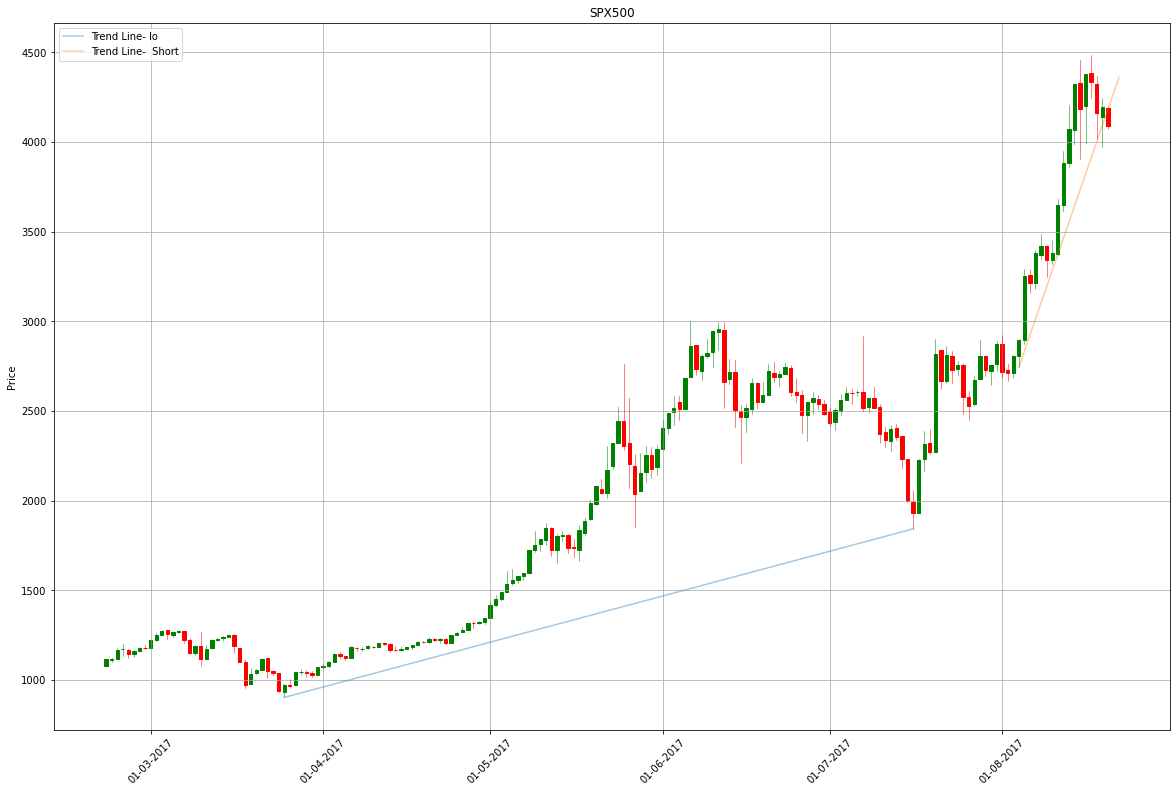

In [47]:
fig = plt.figure(figsize=(20,13))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)


ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.plot(X_long, Y_long, label='Trend Line- lo', alpha = 0.4)
ax2.plot(X_mid1, Y_mid1, label='Trend Line-  Short', alpha = 0.4)


plt.ylabel("Price")
plt.title('SPX500')
ax1.grid(True)
plt.legend(loc='best')
plt.xticks(rotation=45)
candlestick_ohlc(ax1, df1.values, width=0.6, colorup='g', colordown='r')
plt.show()